In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

In [2]:
def plots(freqs, measures, order, ylabels=None):
    fig = plt.figure(figsize=(20, 75))
    colors = np.random.uniform(0,0.6, (len(list(measures.keys())), 3))
    
    for num, measure in enumerate(measures.keys()):
        ax = fig.add_subplot(int(round(freqs.shape[0]*9/3)), 3, num + 1)
        ax.plot(freqs[order], np.array(measures[measure],dtype='float')[order], color = colors[num], marker = 'o', linestyle=':')
        ax.set_title((measure.upper()).replace('_', ' '), fontsize=25)
        ax.plot(0, 0, marker=' ', linestyle=' ')
        ax.grid()
        plt.xlabel('Hz', fontsize=15)
        if not(ylabels == None):
            plt.ylabel(ylabels[num], fontsize=15, rotation=0, labelpad=25)

    plt.tight_layout()
    plt.show()
    
def read_measures_freqs(dataset_base_path):
    csvs_names = os.listdir(dataset_base_path)

    jpdaf_dir = [name for name in csvs_names if 'ennjpdaf' in name.split('_')]

    measures = {
        'vcl': [],
        'vsl': [],
        'vap_mean': [],
        'alh_mean': [],
        'lin': [],
        'wob': [],
        'stra': [],
        'bcf_mean': [],
        'mad': []
    }
    
    ylabels = [r'$\frac{\mu m}{s}$', r'$\frac{\mu m}{s}$', r'$\frac{\mu m}{s}$', 
              r'$\mu m$', '', '', '', 'Hz', r'$\mu m$']
    
    freqs = []
    for freq in jpdaf_dir:
        fps = (freq.split('Hz'))[0].split('_')[-1]
        freqs.append(fps)
        full_path_file = os.path.join(dataset_base_path, freq)
        freq_df = pd.read_csv(full_path_file)
        for measure in list(measures.keys()):
            measures[measure].append(freq_df[measure].mean())

    freqs = np.array(freqs, dtype='int')
    order = np.argsort(freqs)
    return freqs, measures, order, ylabels

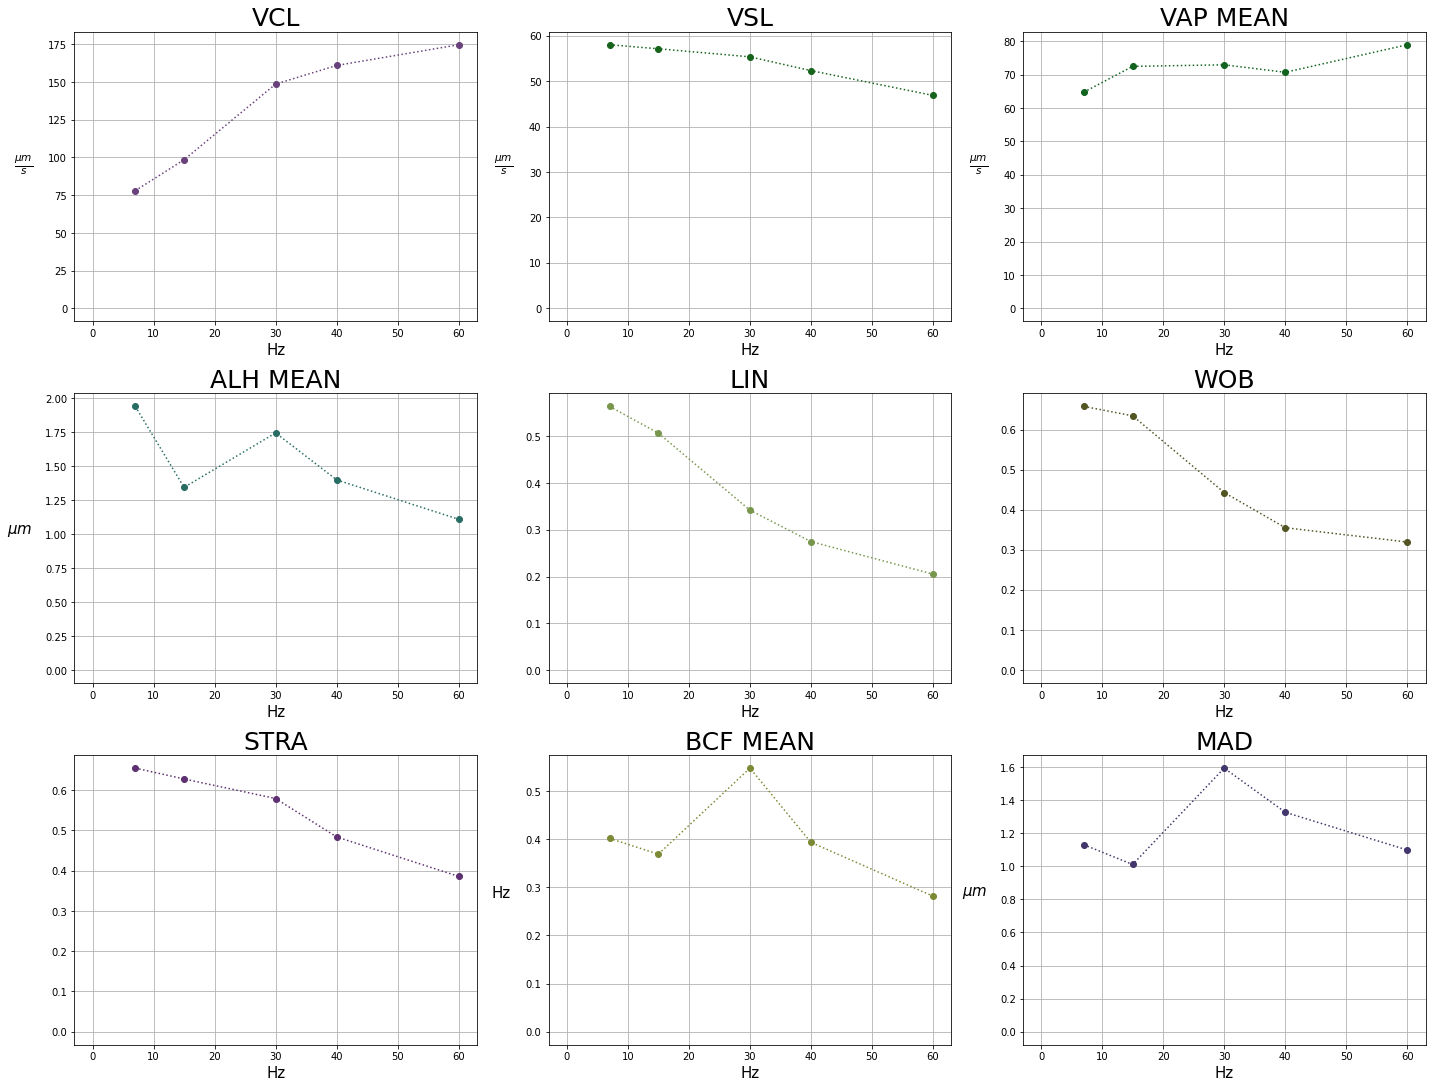

In [73]:
indir = 'measures'
dataset = 'dataset_1'

dataset_base_path = os.path.join(indir, dataset)
freqs, measures, order, ylabels = read_measures_freqs(dataset_base_path)
plots(freqs, measures, order, ylabels)


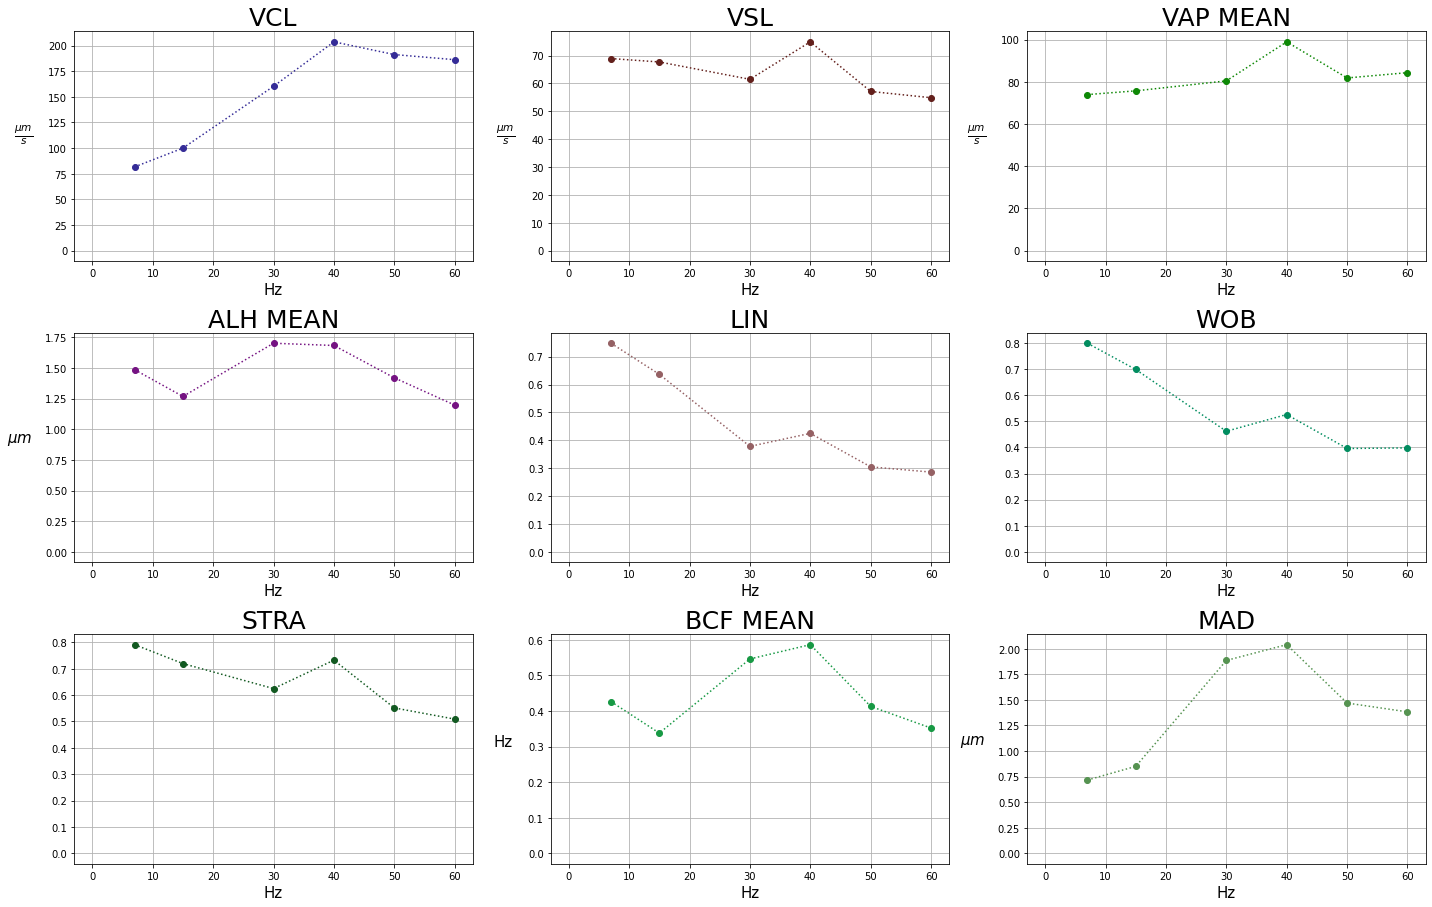

In [86]:
indir = 'measures'
dataset = 'dataset_2'

dataset_base_path = os.path.join(indir, dataset)
freqs, measures, order, ylabels = read_measures_freqs(dataset_base_path)
plots(freqs, measures, order, ylabels)

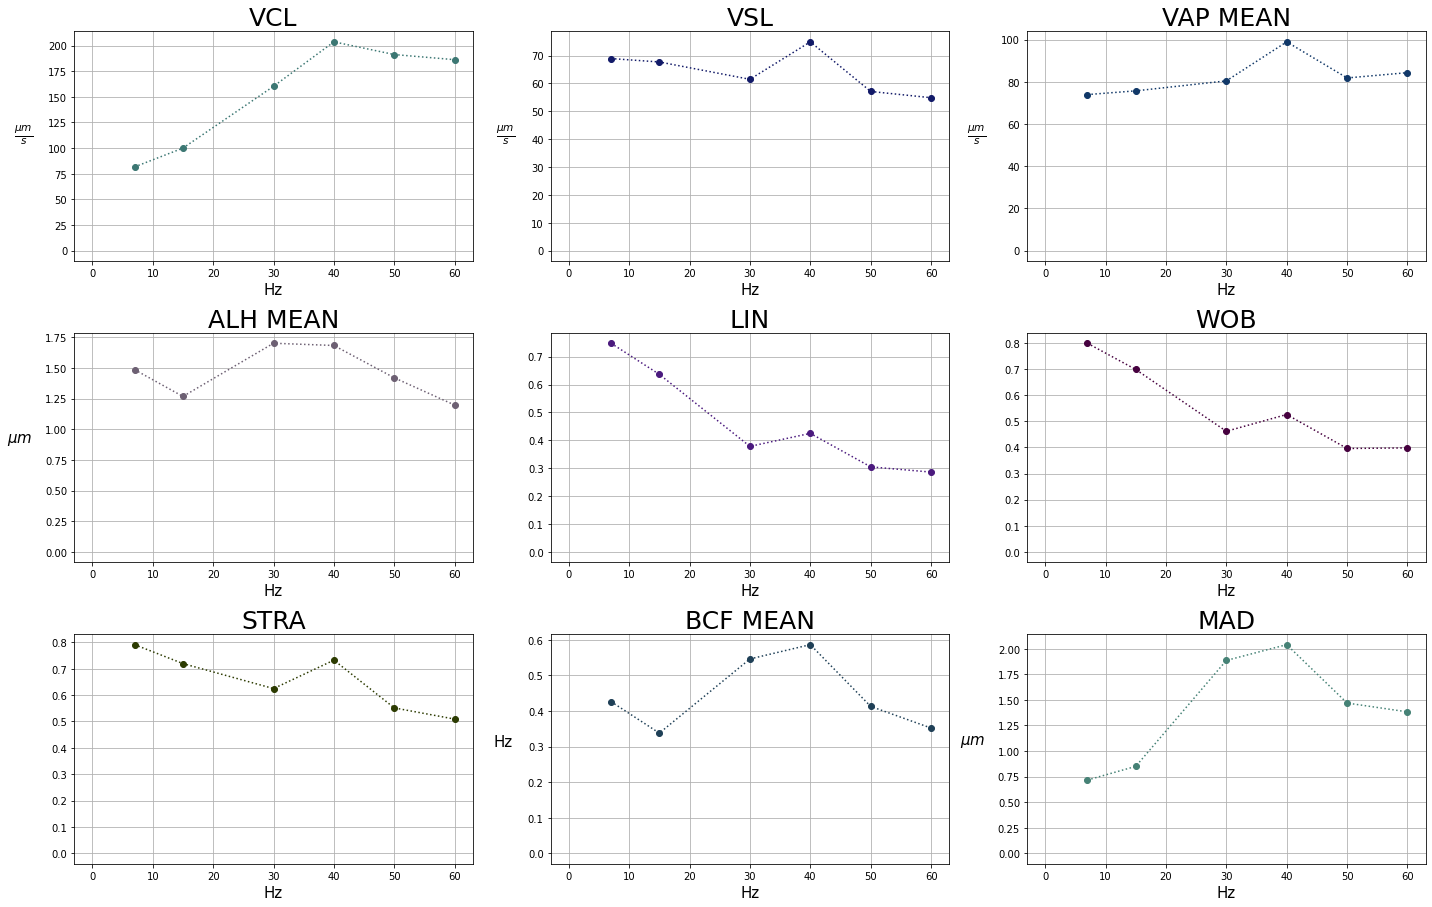

In [74]:
indir = 'measures'
dataset = 'dataset_2'

dataset_base_path = os.path.join(indir, dataset)
freqs, measures, order, ylabels = read_measures_freqs(dataset_base_path)
plots(freqs, measures, order, ylabels)

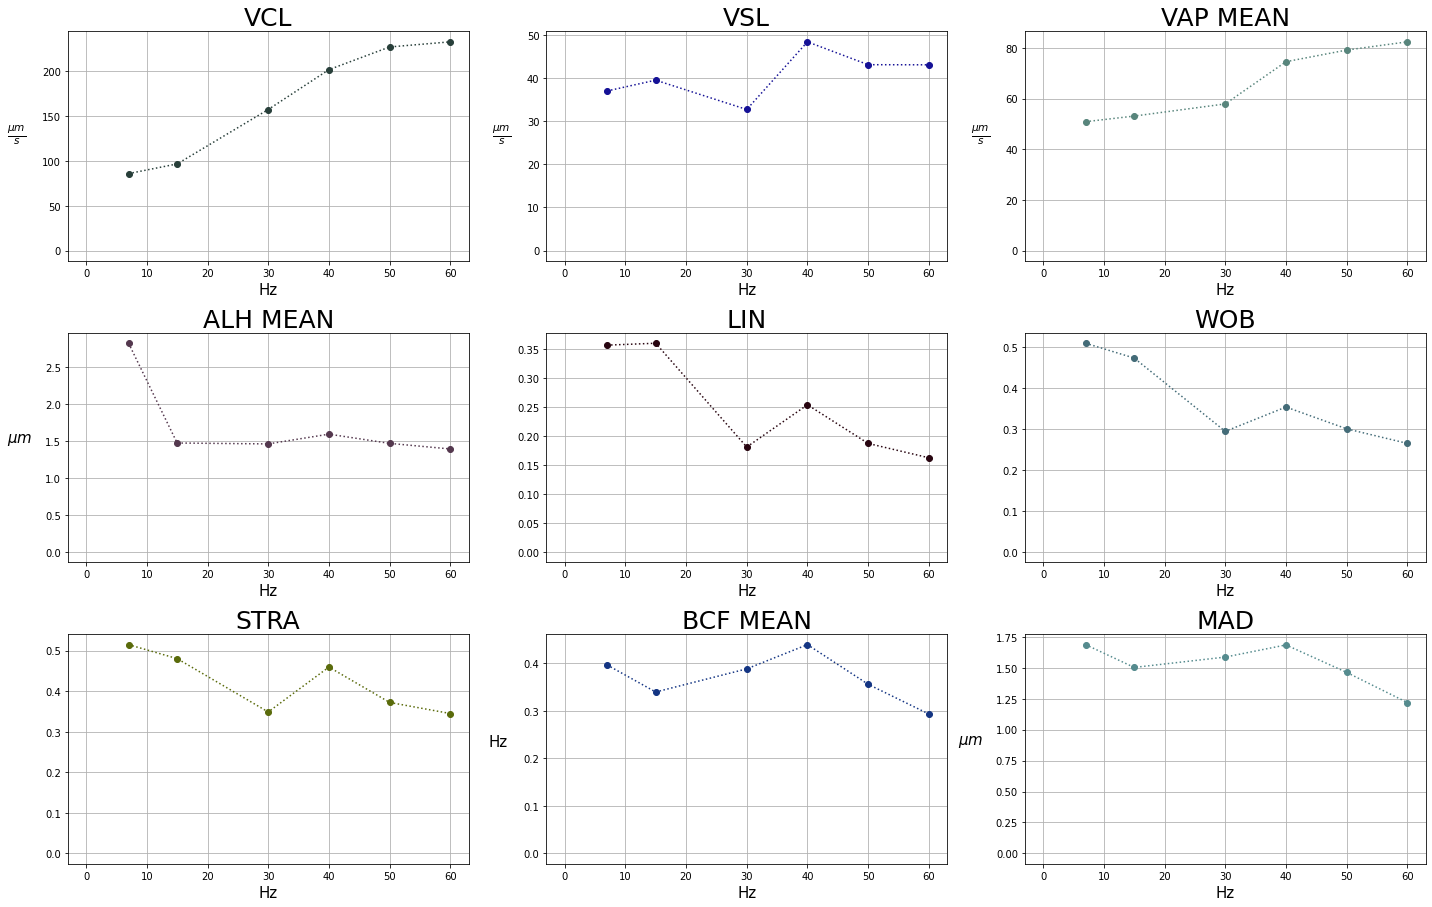

In [75]:
indir = 'measures'
dataset = 'dataset_3'

dataset_base_path = os.path.join(indir, dataset)
freqs, measures, order, ylabels = read_measures_freqs(dataset_base_path)
plots(freqs, measures, order, ylabels)

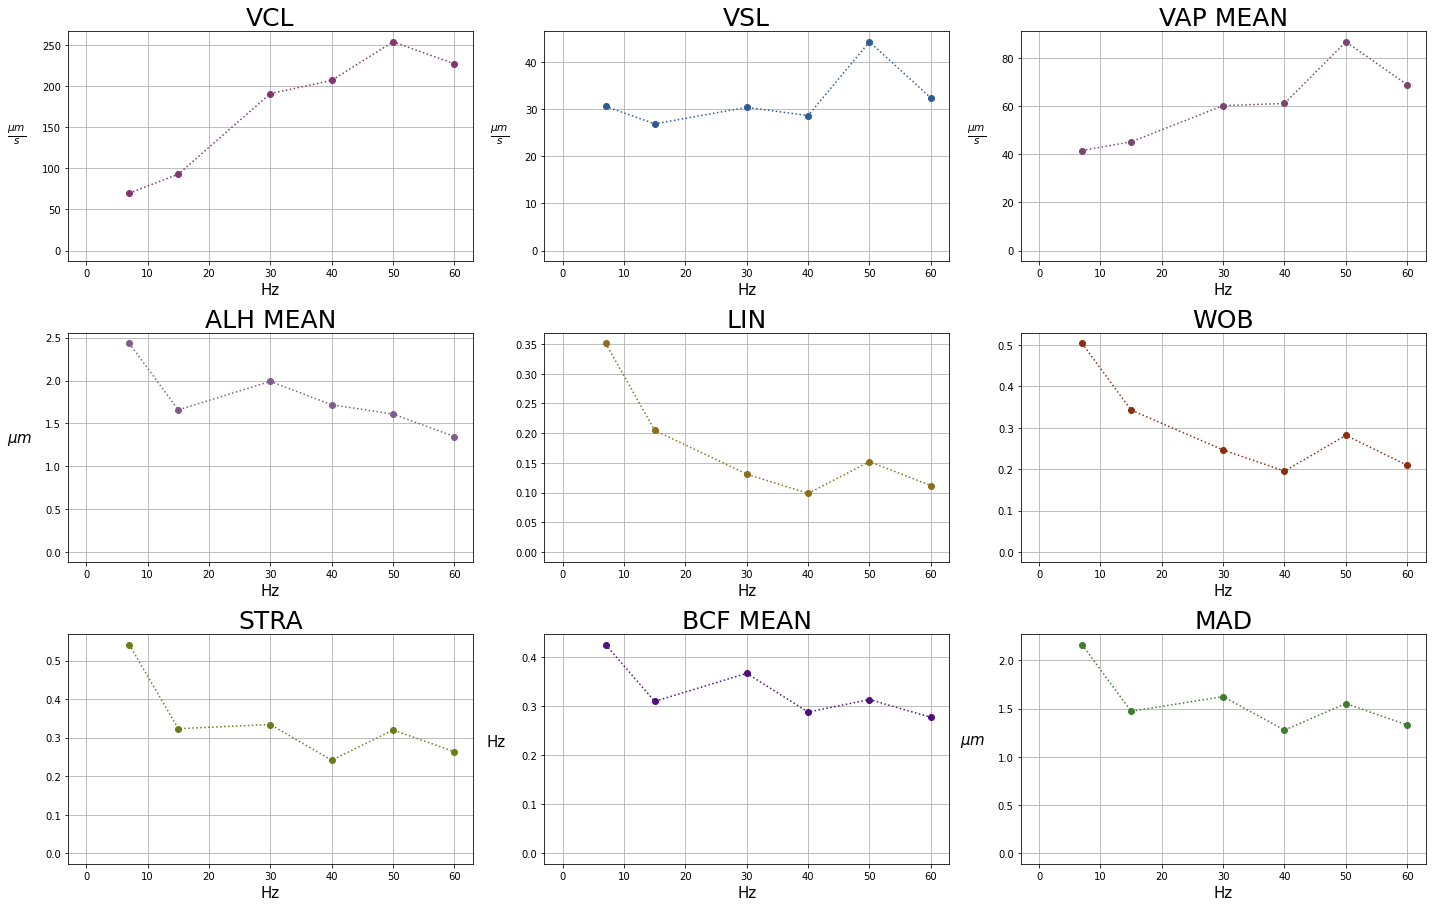

In [76]:
indir = 'measures'
dataset = 'dataset_4'

dataset_base_path = os.path.join(indir, dataset)
freqs, measures, order, ylabels = read_measures_freqs(dataset_base_path)
plots(freqs, measures, order, ylabels)

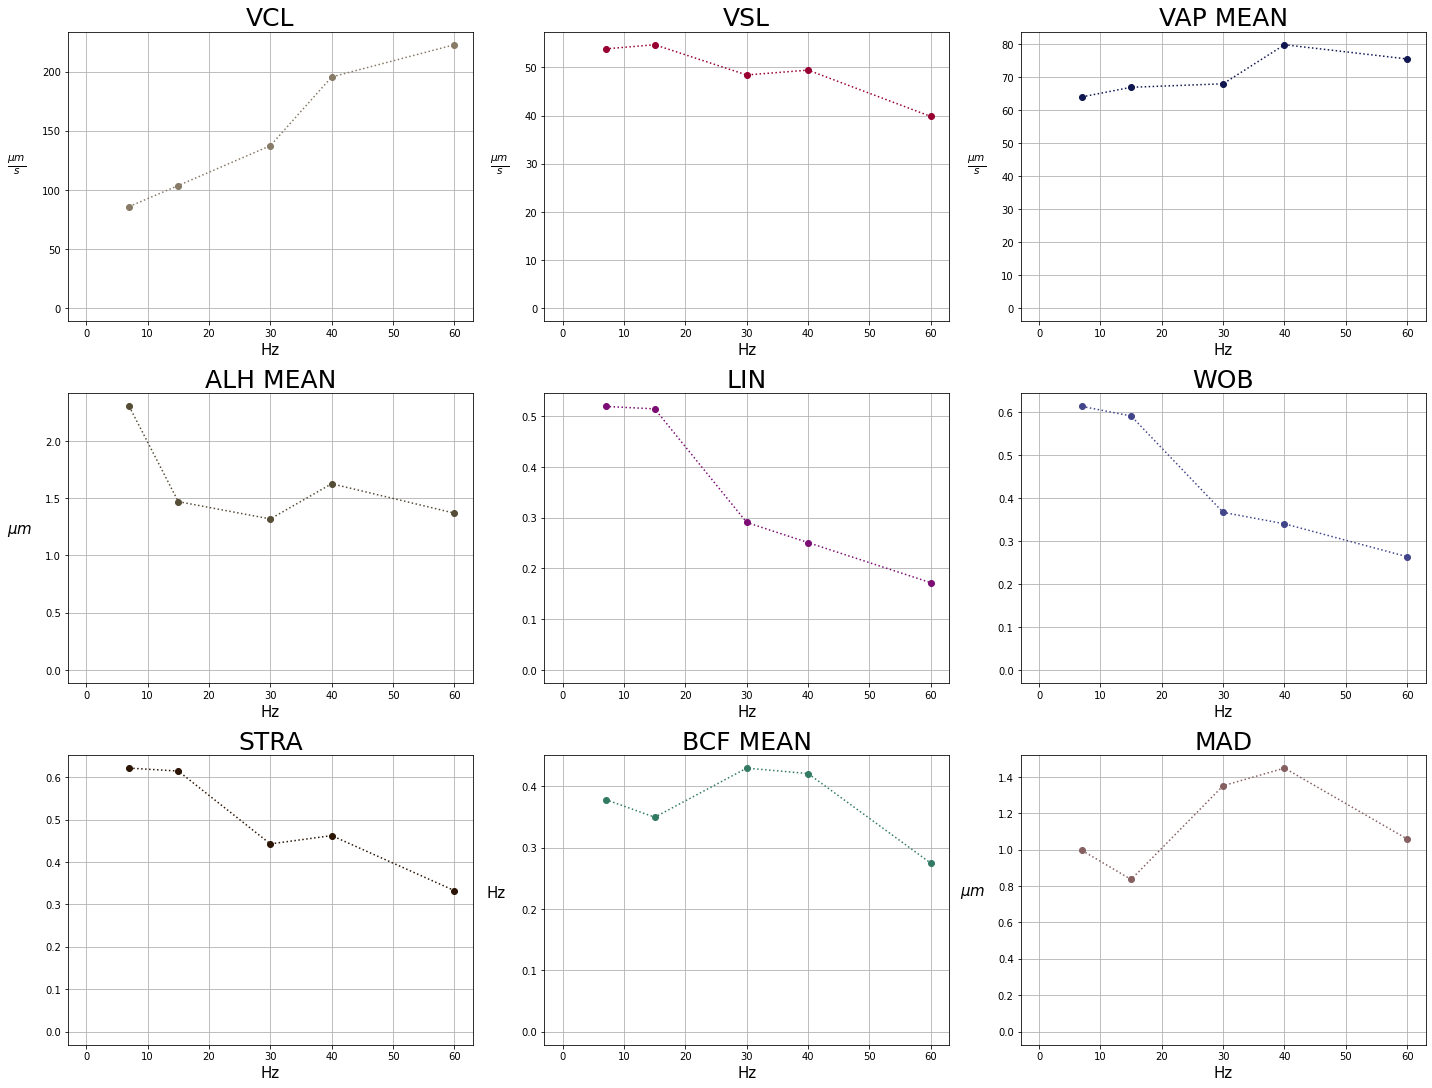

In [77]:
indir = 'measures'
dataset = 'dataset_5'

dataset_base_path = os.path.join(indir, dataset)
freqs, measures, order, ylabels = read_measures_freqs(dataset_base_path)
plots(freqs, measures, order, ylabels)

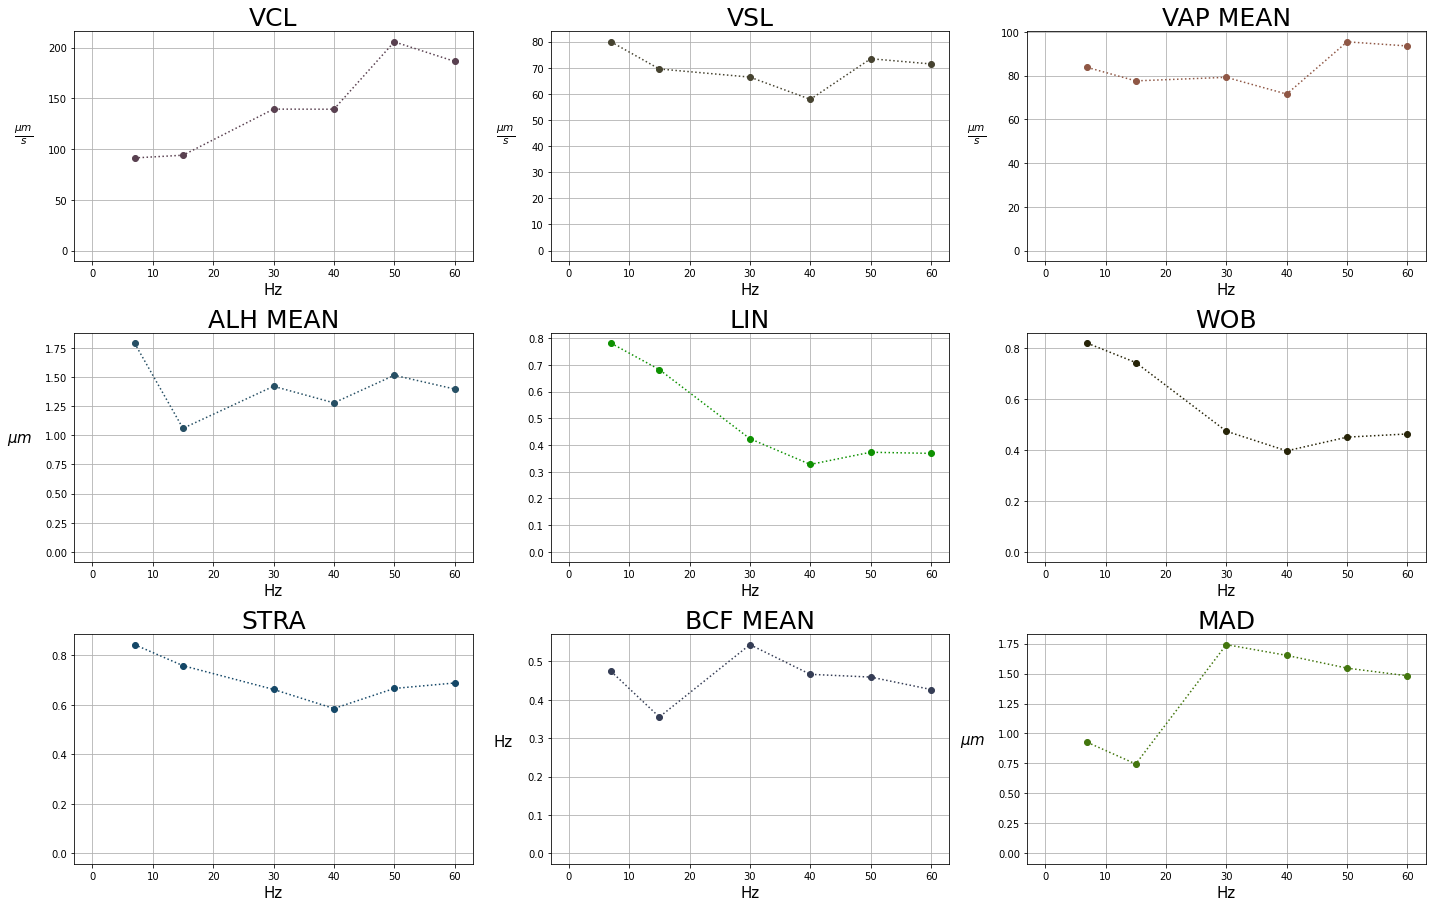

In [78]:
indir = 'measures'
dataset = 'dataset_6'

dataset_base_path = os.path.join(indir, dataset)
freqs, measures, order, ylabels = read_measures_freqs(dataset_base_path)
plots(freqs, measures, order, ylabels)

# REAL DATA

In [4]:
!ls real_sequences/

1 026          11             9              tracks_WHO.csv
10             4              tiff_files


In [35]:
indir = 'real_sequences/10/tracks_WHO.csv'
csv = pd.read_csv(indir)

Text(0.5, 0, 'mad')

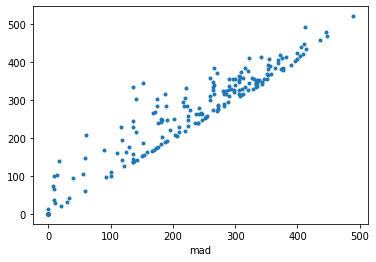

In [37]:
plt.plot(csv['vsl'], csv['vcl'], marker='.', linestyle=' ')
plt.xlabel('mad')